# Raphael Lim 2000786J Part B

### Test if Gpu is in use

In [20]:
    ### Important Imports
    import tensorflow as tf
    from tensorflow import keras
    import sys
    import numpy as np
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    ### Custom Imports
    from tensorflow.keras import datasets, layers, models, preprocessing

    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
    print(tf.test.is_built_with_cuda())
    print(tf.version.VERSION)
    print(sys.version)

Num GPUs Available:  1
True
2.7.0
3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [21]:
# To check if the model is over fitted

def show_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

# Data import and cleaning

In [22]:
# Split Dataset into training and validation 

batch_size = 32
img_height = 180
img_width = 180

Image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,        
    horizontal_flip=True,
    height_shift_range=.2,
    vertical_flip = True,
    validation_split = 0.2
)


train_generator = Image_datagen.flow_from_directory(
    './Images/Train',
    target_size=(180,180),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
)

test_generator = Image_datagen.flow_from_directory(
    './Images/Test',
    target_size=(180,180),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

Found 3280 images belonging to 5 classes.
Found 1028 images belonging to 5 classes.


Tensor shape with batch 32:  (32, 180, 180, 3)


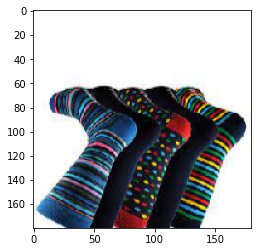

In [23]:
print("Tensor shape with batch 32: ", train_generator[0][0].shape)
image = train_generator[0][0][0]
plt.imshow(image)

In [24]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)


{0: 'Boots', 1: 'Sandals', 2: 'Shoes', 3: 'Slippers', 4: 'Socks'}


# Creating the model

In [25]:
num_classes = 5

model = models.Sequential()
model.add(tf.keras.Input(shape=(180, 180, 3)))

# Layer 1
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))

# Layer 4
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

# Layer 5
model.add(layers.Dense(512, activation='relu'))
# layer 6
model.add(layers.Dense(num_classes, activation= "sigmoid"))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 dropout_2 (Dropout)         (None, 41, 41, 128)      

In [27]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

Epoch 1/50
103/103 [==============================] - ETA: 0s - loss: 1.5170 - accuracy: 0.3241
Epoch 00001: saving model to Models\cp.ckpt
103/103 [==============================] - 28s 266ms/step - loss: 1.5170 - accuracy: 0.3241 - val_loss: 1.5499 - val_accuracy: 0.3696
Epoch 2/50
103/103 [==============================] - ETA: 0s - loss: 1.2448 - accuracy: 0.4829
Epoch 00002: saving model to Models\cp.ckpt
103/103 [==============================] - 27s 267ms/step - loss: 1.2448 - accuracy: 0.4829 - val_loss: 1.3869 - val_accuracy: 0.3463
Epoch 3/50
103/103 [==============================] - ETA: 0s - loss: 1.1153 - accuracy: 0.5427
Epoch 00003: saving model to Models\cp.ckpt
103/103 [==============================] - 27s 265ms/step - loss: 1.1153 - accuracy: 0.5427 - val_loss: 1.3433 - val_accuracy: 0.4329
Epoch 4/50
103/103 [==============================] - ETA: 0s - loss: 0.9940 - accuracy: 0.6104
Epoch 00004: saving model to Models\cp.ckpt
103/103 [=============================

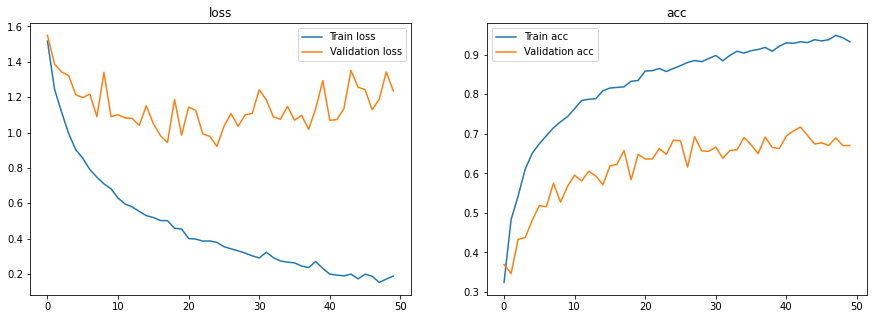

In [28]:
checkpoint_path = "Models/cp.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy', verbose=1, patience=1, mode='max', baseline=20)

history = model.fit(
    train_generator,
    validation_data=test_generator, epochs=50, verbose=1, callbacks=[cp_callback]
)
show_history(history)

In [29]:
model.save("FootWear_detector.h5")

In [30]:
scores = model.evaluate(test_generator, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))


33/33 [==============================] - 6s 182ms/step - loss: 1.2445 - accuracy: 0.6770
Accuracy: 67.70%


In [31]:
# model = keras.models.load_model('Best_Footwear_Detector.h5')
model = keras.models.load_model('FootWear_detector.h5')

(1, 180, 180, 3)
tf.Tensor([[0.14884758 0.14884758 0.14884758 0.14884758 0.40460962]], shape=(1, 5), dtype=float32)
This image most likely belongs to Socks with a 40.46 percent confidence.


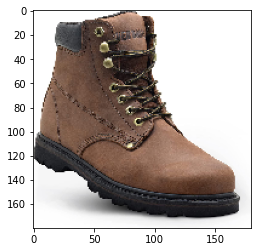

In [32]:
testimage_path = "Unseen_Images/Boots.jpg"
img = tf.keras.preprocessing.image.load_img(
    testimage_path, target_size=(img_height, img_width)
)

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

print(img_array.shape)
plt.imshow(img)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions)

print(score)
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(labels[np.argmax(score)], 100 * np.max(score))
)


# Project Report

### Introduction

The code above is the best model that I could come up with. In this report, I will document my process on how I achieved this model and the problems that arises

### Test 1

I started with Following the 2D cnn labsheet. I followed each step exactly with no research external research done yet. After I got a feel of how 2D cnn worked, I started on collected the data needed to train a model to recognise different types of footwear. The categories are Socks, Shoes, Sandals, Slippers and Boots

Interestingly, I found a dataset containing such images
https://vision.cs.utexas.edu/projects/finegrained/utzap50k/

It contained images like this

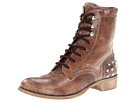

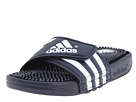

With that I thought that the process of splitting the data and training the data would be effortless. However, that was not the case.

The dataset did not contain any images for socks. So I downloaded 200+ Images of socks from the internet. Below is an example of one of them

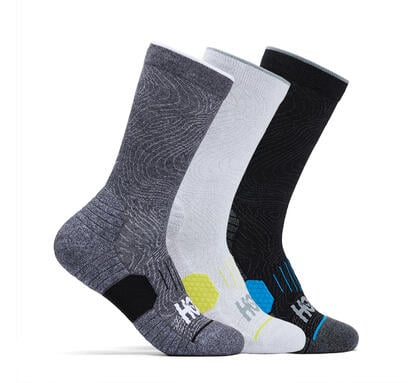

### I started training with model with the following code

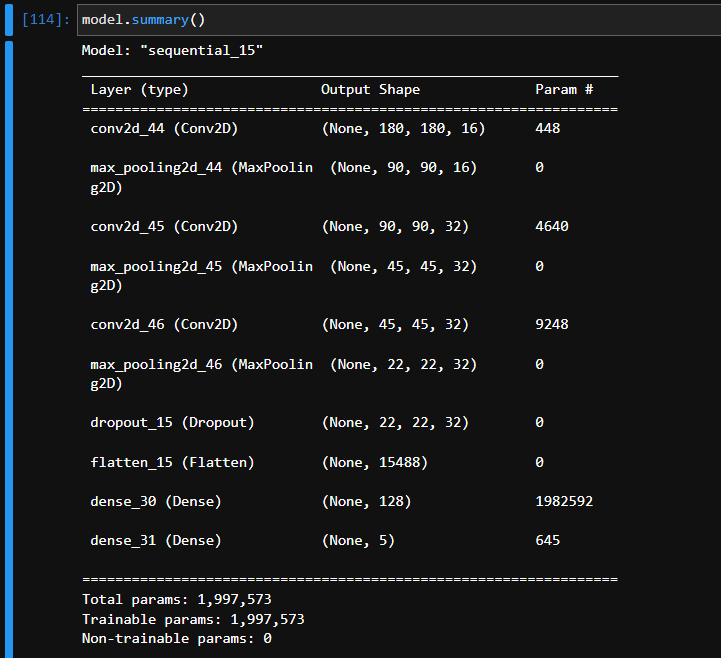
-----------------------------------
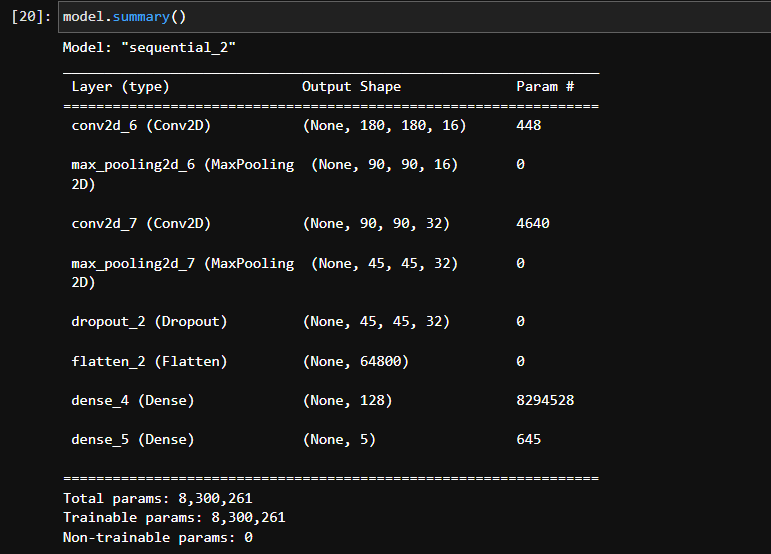
-----------------------------------
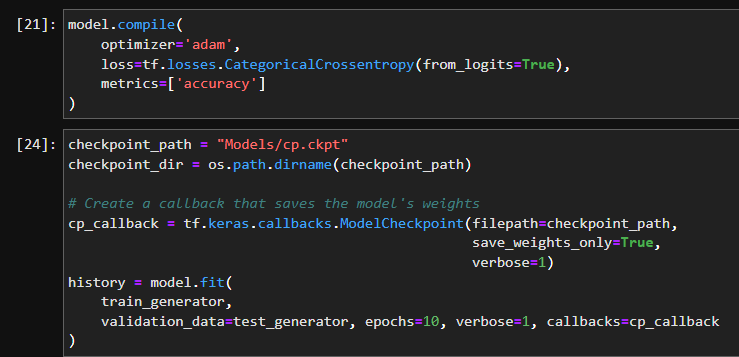

### This was when I notice something interesting. 
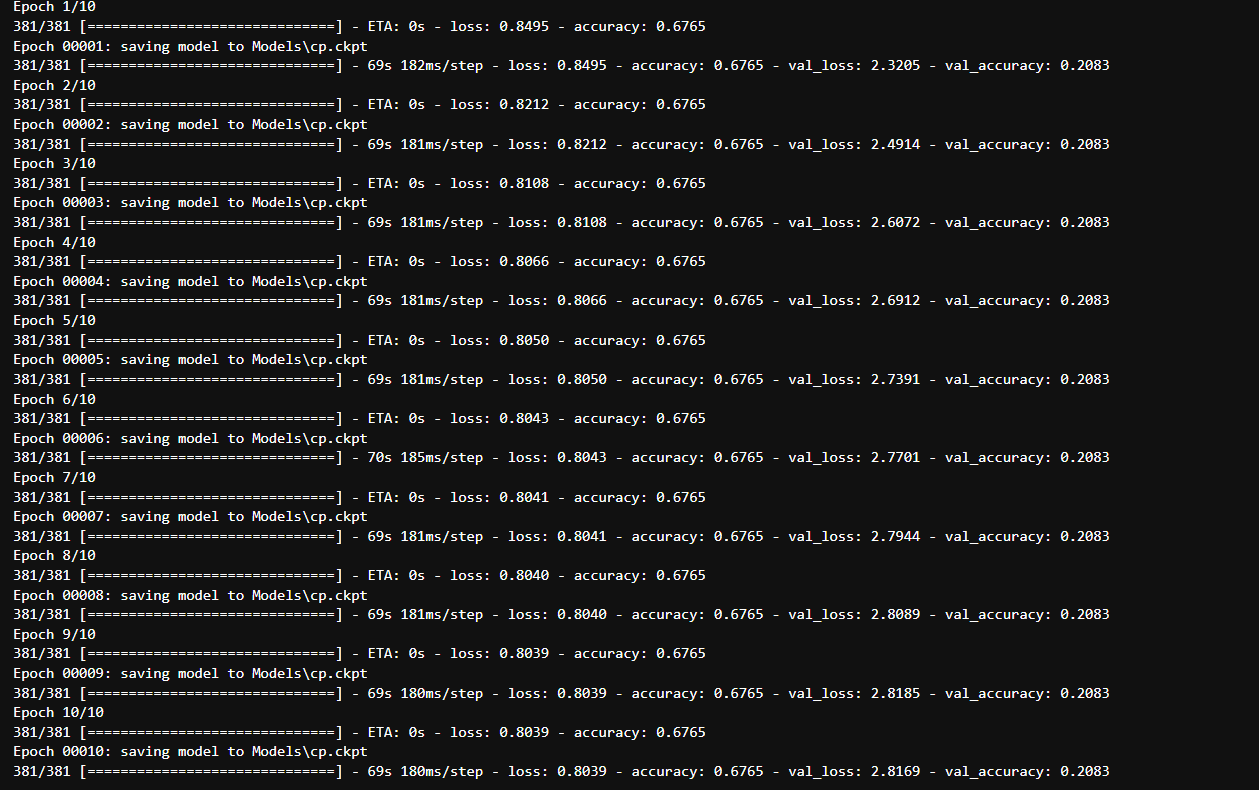

> Accuracy, val-accuracy and loss remained very constant. I did some research and found out this usually happens when the learning rate is too high. Another pssible cause of this problem is the complexity of my model's neural network. There might be too many layers in my model. Also having more training more data would help with solve this issue. 

> Naturally, the accuracy of my first model is very low at 28%

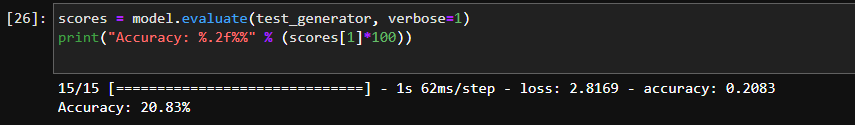


### Test 2

Here I am going to try reducing the learning rate. However this test did not bear results

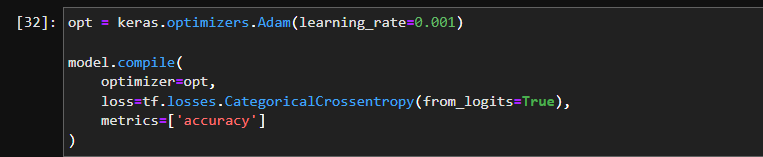
-----------------------------------

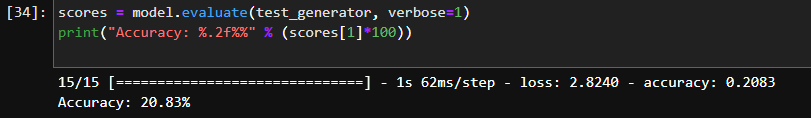
-----------------------------------
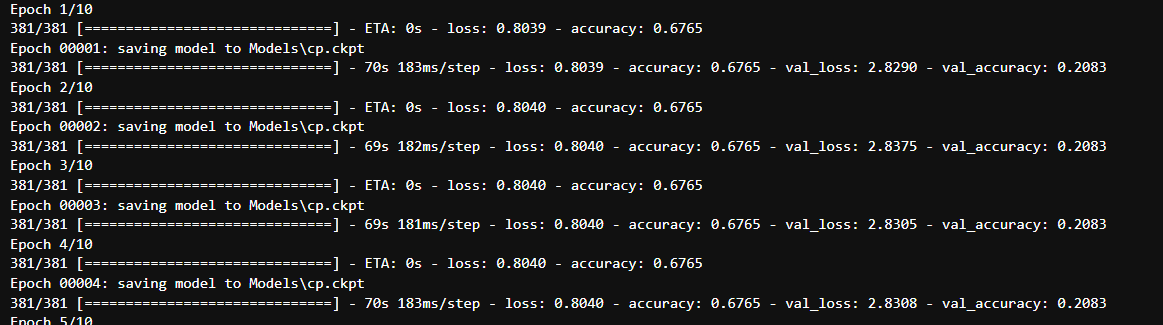

### Test 3

For this test, I am going to revist my data set. I decided on this because the data downloaded online was to train models for online stores where all the images are taken from the same angle. I also had different amounts of data in each class. My sock class has 129 images while the boots class have over a eight thousand images. 

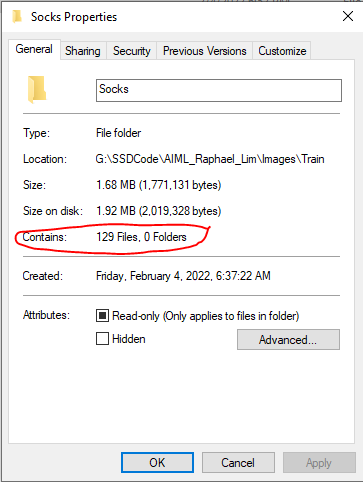
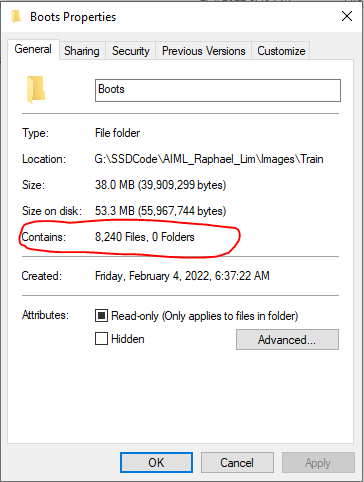

From this information, I decided to go with the normal route of searching up images of my class and downloading them. I am going to go for 200 images for each class in the training set and 20 images for each class in the test data set. I decided to delete all the data from online dataset as they contain images taken from a single angle with no other objects or clutter in the background. The dataset is good for e-commerce shops. However, to detect a footwear of any image, I think that training the model with images off google might prove to be better

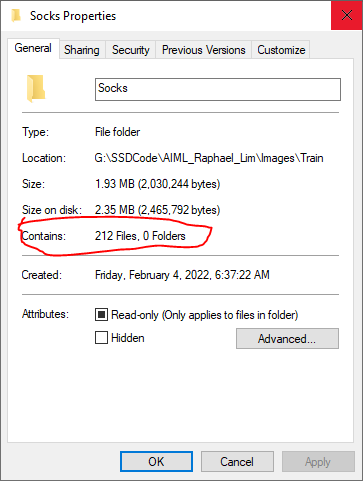
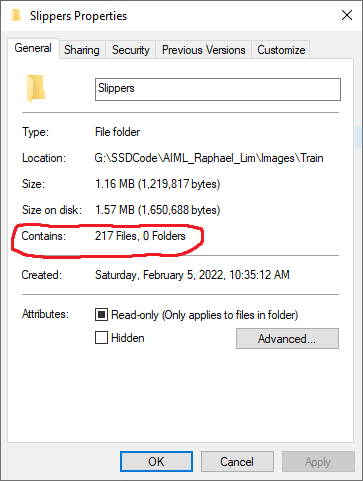
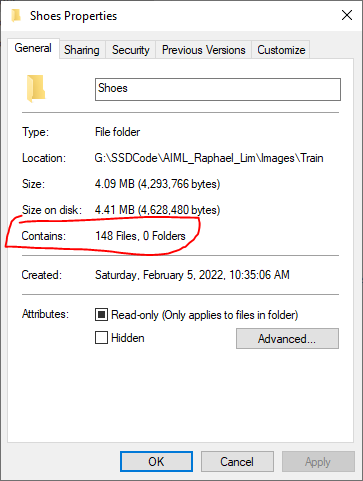
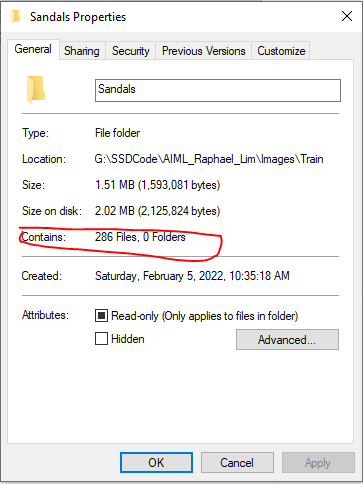
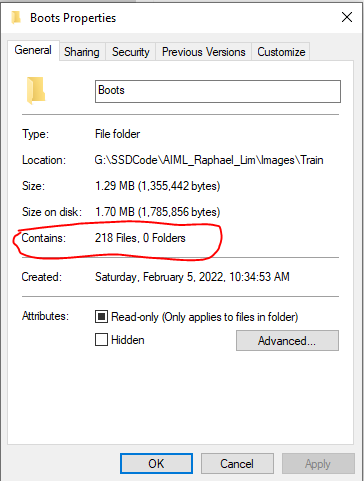

### Here are the results of Test 3
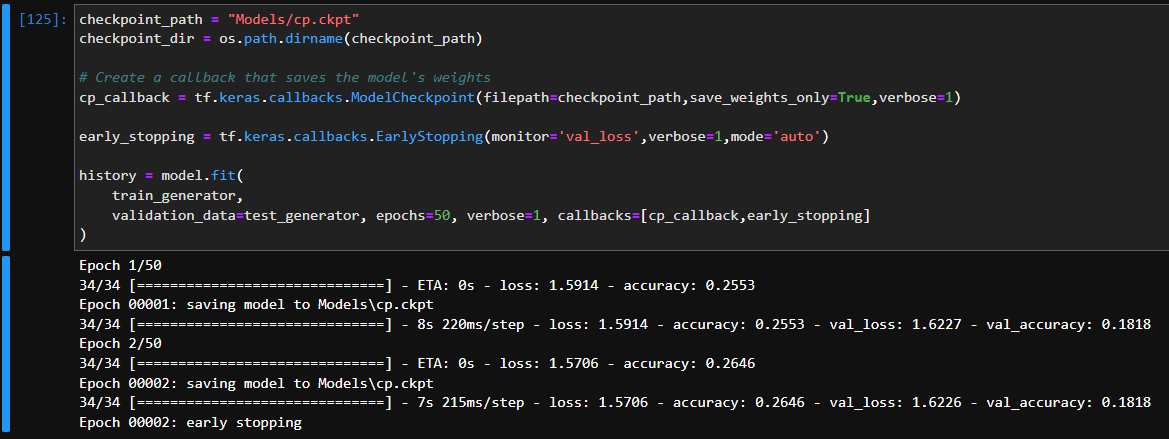

In conclusion, the results of Test 3 was quite dissapointing. It seems the validation loss and accuracy still remains constant even after reducing the dataset to have roughly the same number of images in each class.

> In this test, I have also increased the number of epochs while training and added an early stop callback function. In case that the model actually learns and the loss is reduced with each epoch, the model should continue to learn pass 10 epochs. However, I want the model to stop learning when loss is constant 
> I also increased the dropout from 0.2 to 0.8 to see if it would change anything

### Test 4

After some research, I learned that this issue is caused by the model overfitting. It seems that the model is fitting too well with the current dataset that when tested with other images, it is unable to generalise and classify the data. There are a few solutions to this.

1. Increase the rate at which the dropout layer is applied at each epoch
2. Increase the number of images in the dataset
3. Reduce Network Complexity 
4. Regularise
5. Use batch Norm

Base on this, I decided to try again with the online dataset. With my reduced learning rate, it might yield a different result. If it gets better than I can remove "Increase the number of images in the dataset" off the list. The drawback is that the model will take a very long time to train as it has to go through 50,000 images

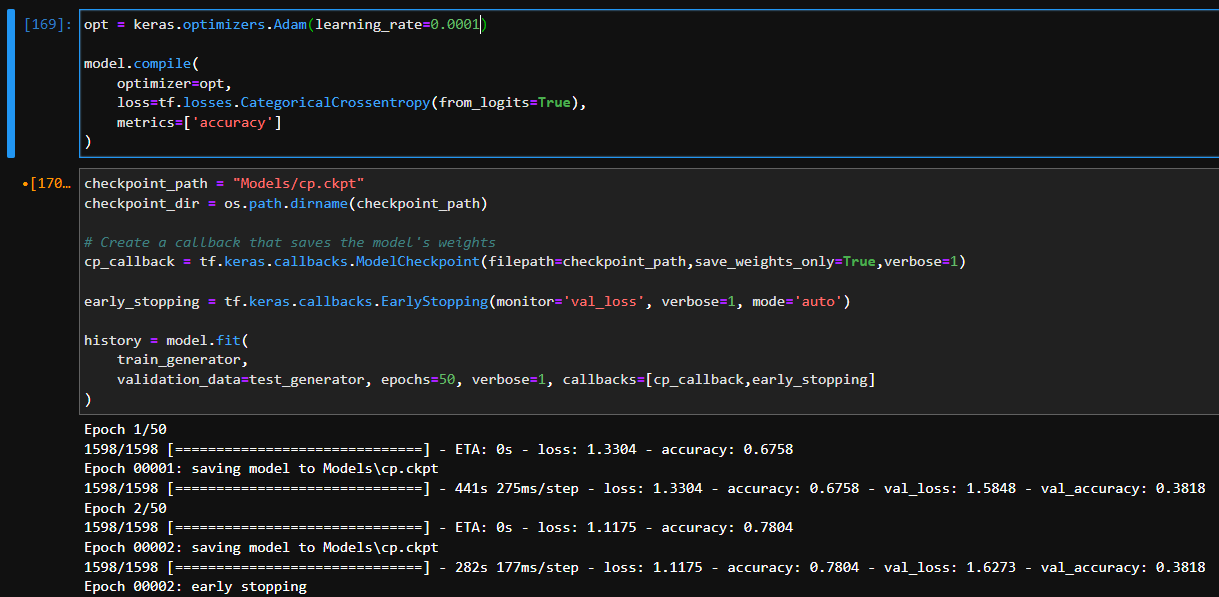

As seen Here the early stop function got called and the model stopped training. But I was curious to see what would happen. So I let it run over night. This model trained with over 50 thousand images.

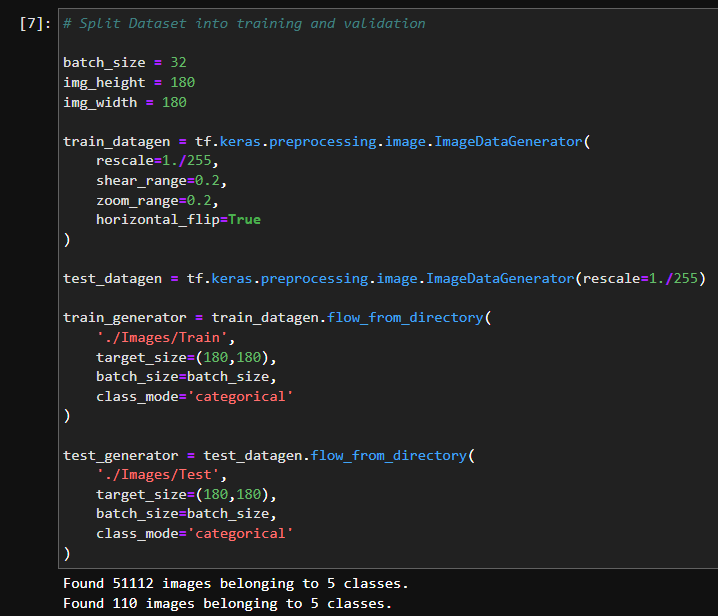
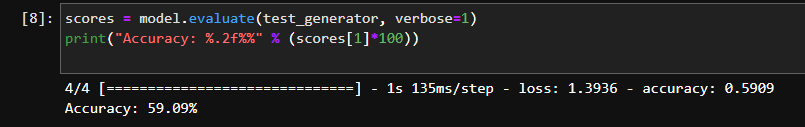

However, this model only had a 59% accuracy. Which was very dissapointing. the val-loss and val-accuracy still stayed relatively constant throughout the training process. Thus I can conclude that the dataset size what not the issue but something else.

### Test 5

In this Test, I am going to start experimenting with the code. I will reduce the number of images in each class to 500 images as to reduce the training time needed. Once the loss and validation accuracy starts improving, I will revert back to using a large dataset to get the absolute best model. However, it seems that right now the code is the issue. So the first thing I did was the drastically increase the dropout and see what would happen.

As a result the dropout did imporve the model by just a little bit.

The next and most interesting change happened when I changed the kernel size from 3x3 to 2x2 of the first CNN layer. 

This change immidiately improved the Model's training accuracy and overall accuracy.

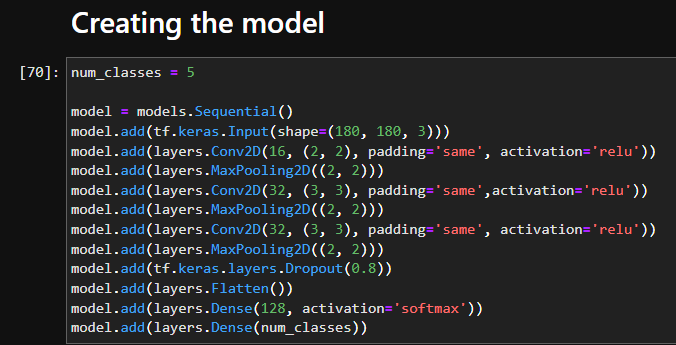

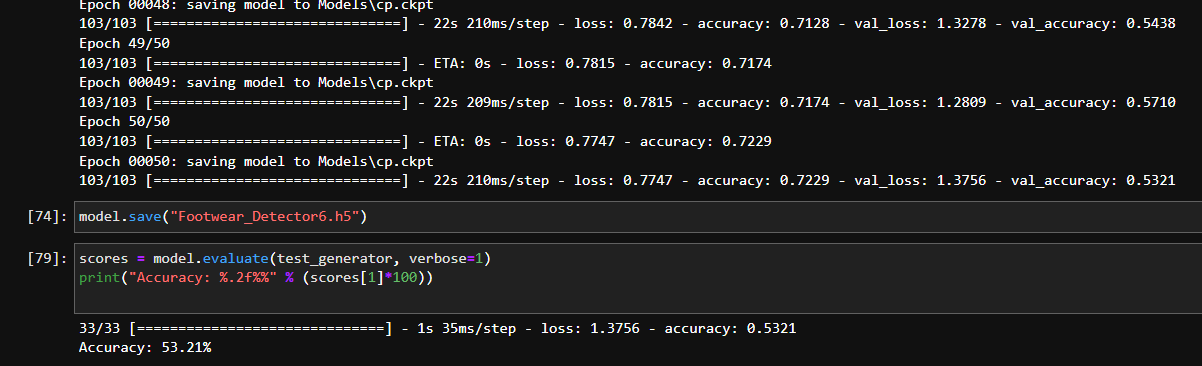

An observation made; The accuracy and validation accuracy both started around the same. However, both started to change quite soon after. Around the fifth epoch. The validation accuracy started to increase slower than the training accuracy. 

I suspect that the model is learning well with the training data given. However, It struggles to generalise. So when thrown an image, it has never seen before, the model sturggles to identify the class. 


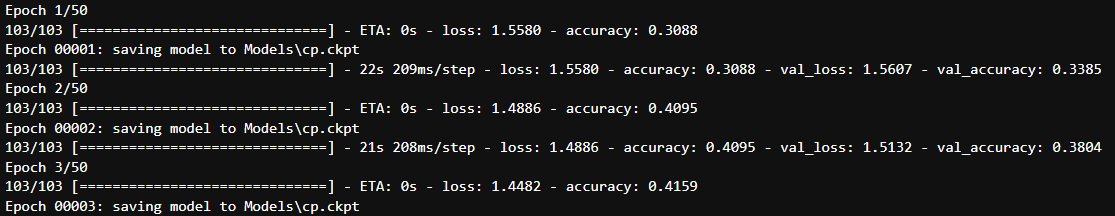
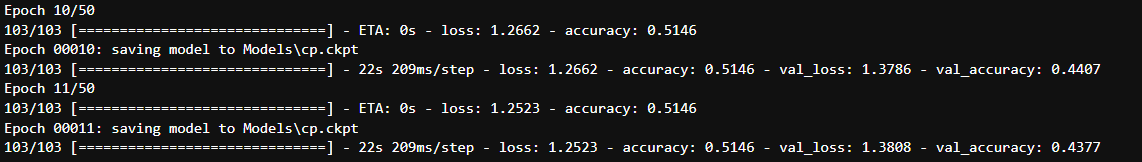

I will test that hypothesis later. Right now I am going to test if reducing the kernal on the other 2D cnn models will result in a higher accuracy

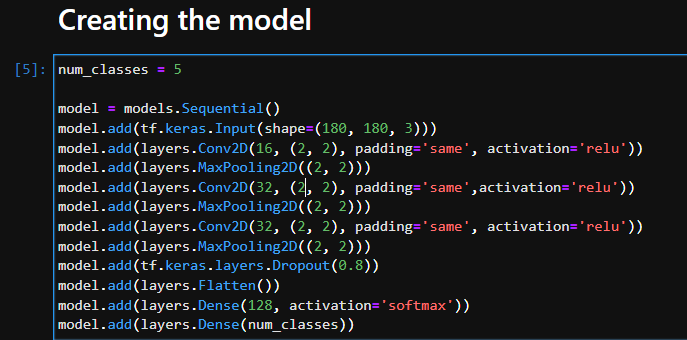
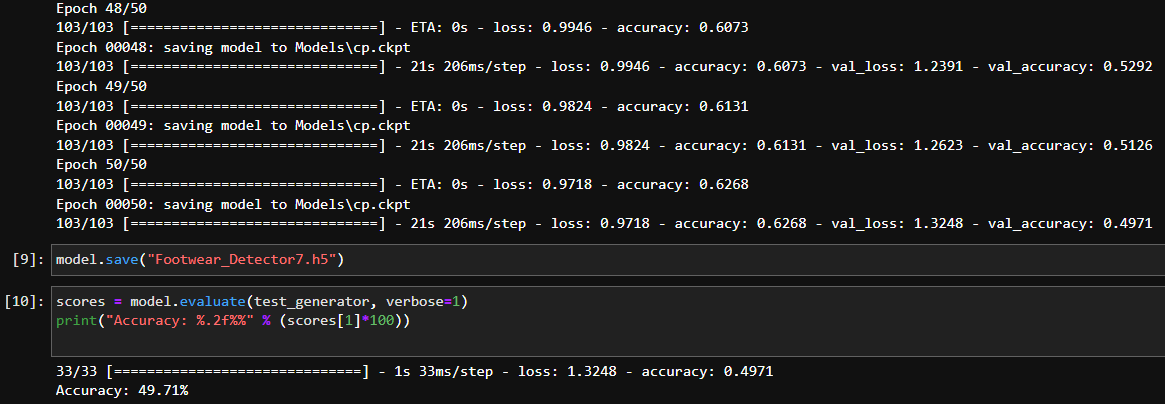

As a result, Reducing the kernal on all cnn layers does not improve the accuracy but instead, decreases it.

Now I will revert back to a 2x2 kernal on the first layer and start tweaking the other hyperparameters till I can get a result of over 75%

> At this point, I found out that an even kernal size is not optimal. This is because having a symmetrical output feature can help deal with distortion as there is a center pixel. Thus I will revert back the kernal size to 3x3.

> I have also learned from reading articles online that having a dropout of 0.8 is insane as it is the probability of dropping the input layers. So having an 80% chance that the input layer will be dropped is too much. Thus I have changed it to 0.2.

> This brings me back to square one but as of now what i have learned is that.

> 1. The images I have now is able to train a model.
> 2. The code for the model is the one that needs to be tweaked and improved
> 3. I should not waste time if the model does not improve it's accuracy by the 10th epoch

### Test 6

In this test I want to experiment is layer numbers. Right now, My model has 3 2D cnn layers. However, the models that I have found on the web seem to use 4 2D cnn layers instead. So i'll try that.

I have also added a useful function that I have to check if my model is over fitted.

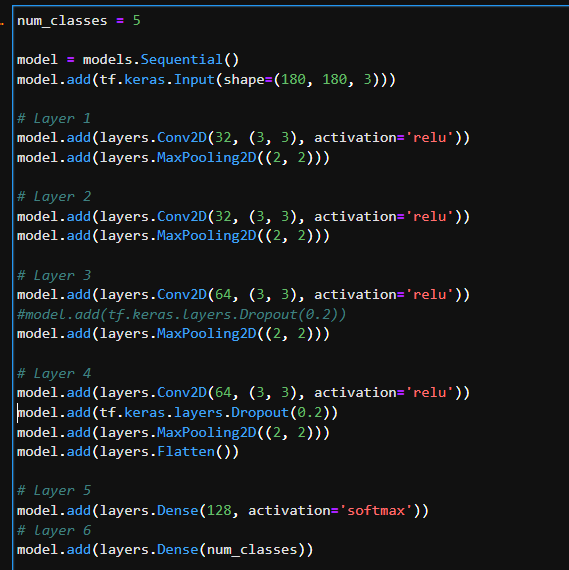
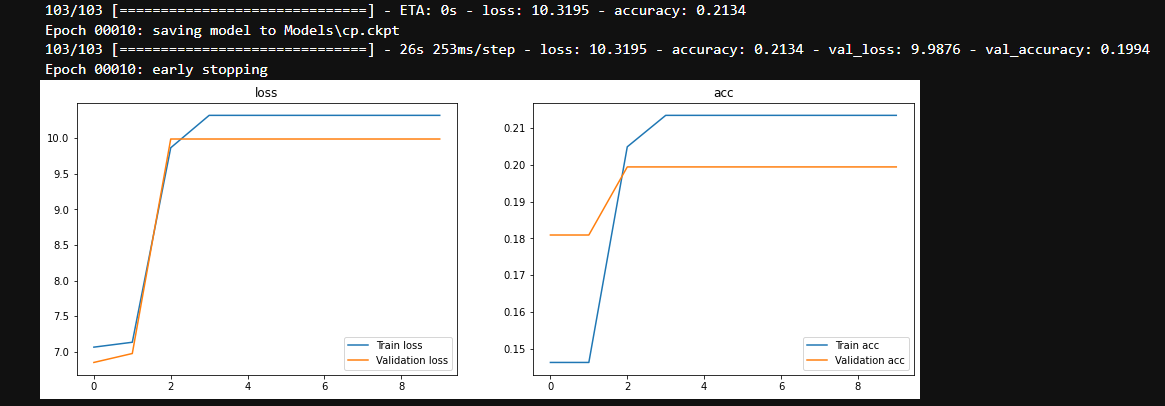

This model has more layers and no padding. With the new function to plot the accuracy and loss of the model, we can see here that the model is actually underfitted. A High loss and low accuracy implies that the model is underfitting. Thus there are a few ways to deal with this.

I removed the padding out of curiousity

1. Add more data
2. Use a different regularization technique
3. Remove some regularization

I am not comfortable with adding more data so i'll remove the dropout layer to see what happens

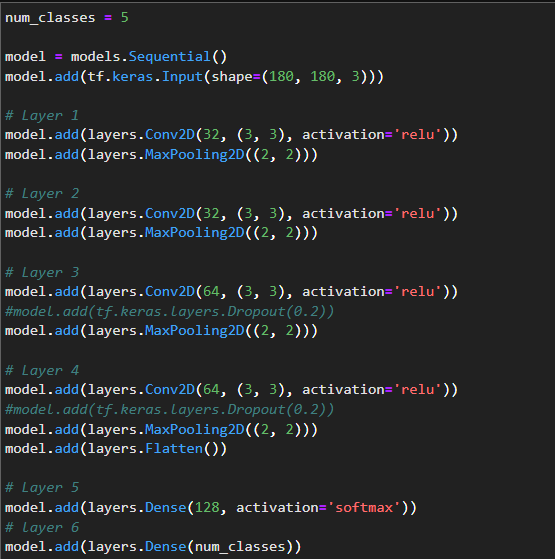
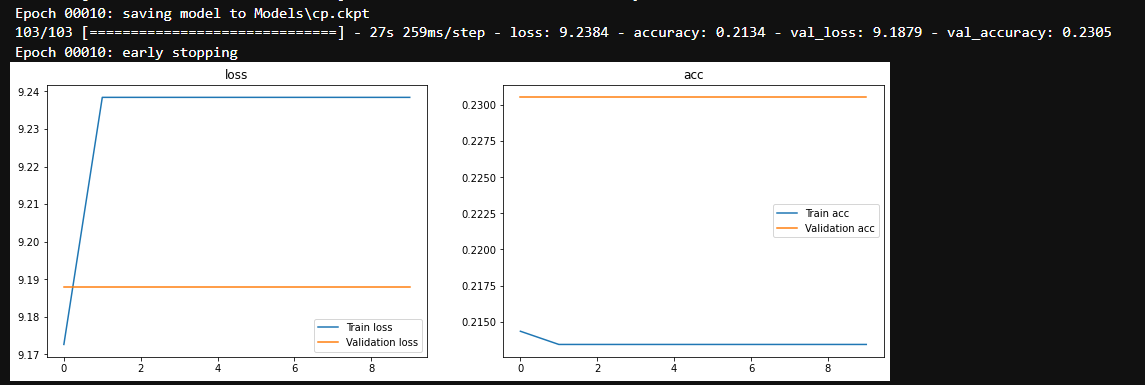

Over here the model seems to be completely getting everything wrong. Which is very dissapointing as theory did not carry over. However I can conclude that 
> Increasing the number of layers improve the accuracy
> Removing padding does not improve accuracy 
> Removing Dropout does not improve accuracy thus, the model is neither underfitting or overfitting. It is just bad for this dataset

With these conclusion, It seems that I have to search up more to find out why my model is having a hard time learning

### Test 7

After digging around the internet, I came across this article about activation functions. https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02

I realised that my model does not have an activation function on the last layer. This is very concerning as the model is just a normal linear classifier which we do not want. 

I started to test every activation function and found that ReLu was the worst while sigmoid and softmax were the best

> I removed the logits from the model's loss function because it does not work with sigmoid

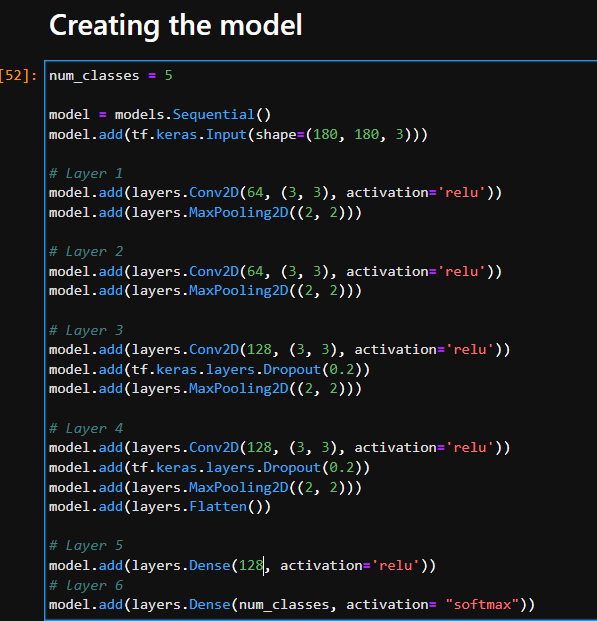

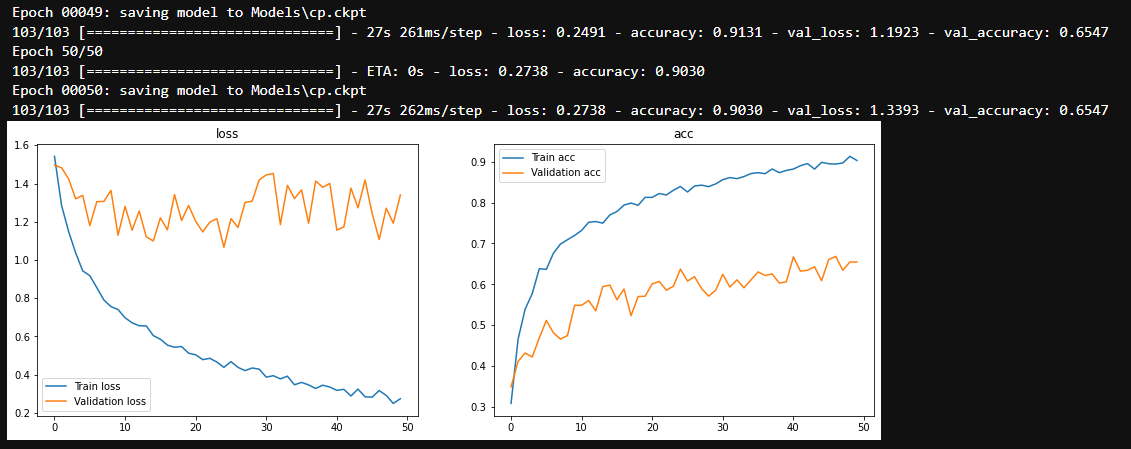

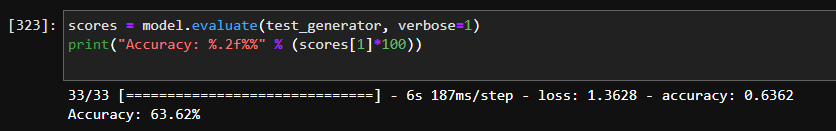

Finally the model managed to get pass 20%

Somehow by feeding all the outputs from the previous layer to the neurons in the dense layers, the model managed to be trained. Given that the activation function for the first dense layer is ReLu and the last dense layer is Sigmoid. 

However, I think I might be able to get a higher accuracy score. Thus I'll experiment with adding more neurons in the first dense layer. Increasing the number from 128 to 512.

After a lot of trial and error this was the best model I configure.

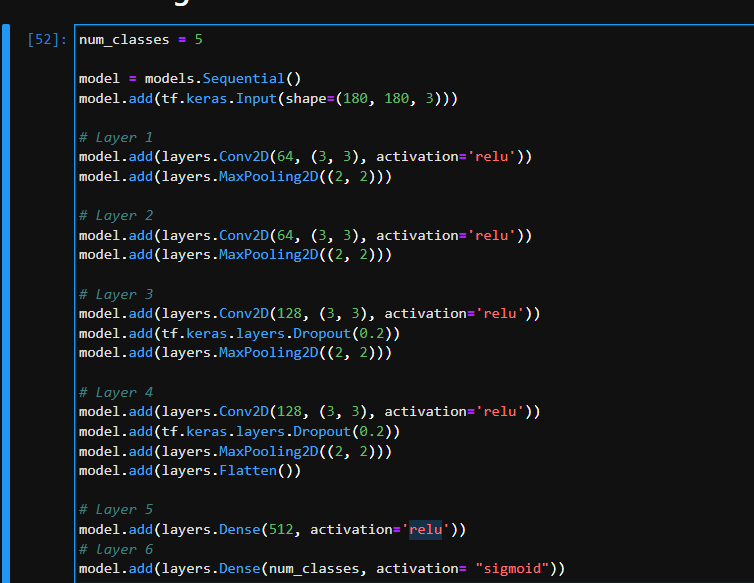

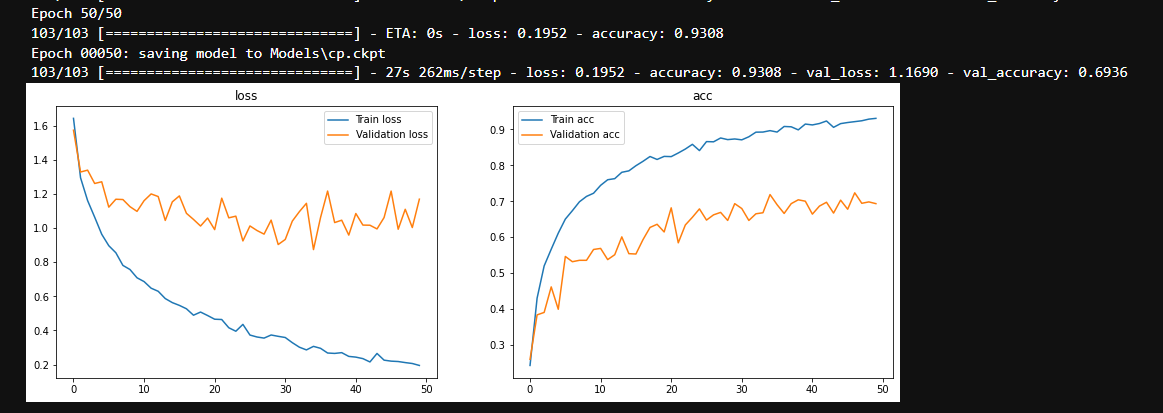

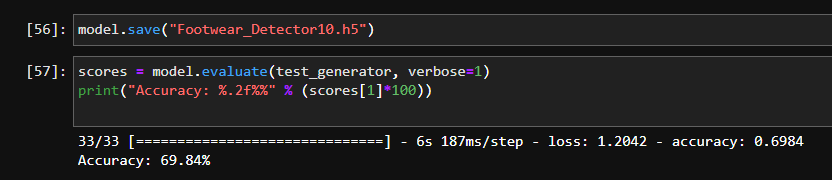